In [281]:
# libraries, dependencies, imports
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [282]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect


In [283]:
# Create engine using the `hawaii.sqlite` database file
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [284]:
# Declare a Base using `automap_base()`
Base = automap_base()

# Use the Base class to reflect the database tables
Base.prepare(autoload_with=engine)

In [285]:
# Print all of the classes mapped to the Base
Base.classes.keys()

['station', 'measurement']

In [286]:
# Assign the measurement class to a variable called `Measurement` and
# the station class to a variable called `Station`
Measurement = Base.classes.measurement
Station = Base.classes.station

In [287]:
# Create a session
session = Session(bind=engine)

In [288]:
# use inspector to understand Measurement table's columns and data types
inspector = inspect(engine)

columns = inspector.get_columns('Measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


# Exploratory Precipitation Analysis

In [289]:
# Find the most recent date in the data set.
most_recent = session.query(Measurement.date).order_by(Measurement.date.desc()).first().date
most_recent

'2017-08-23'

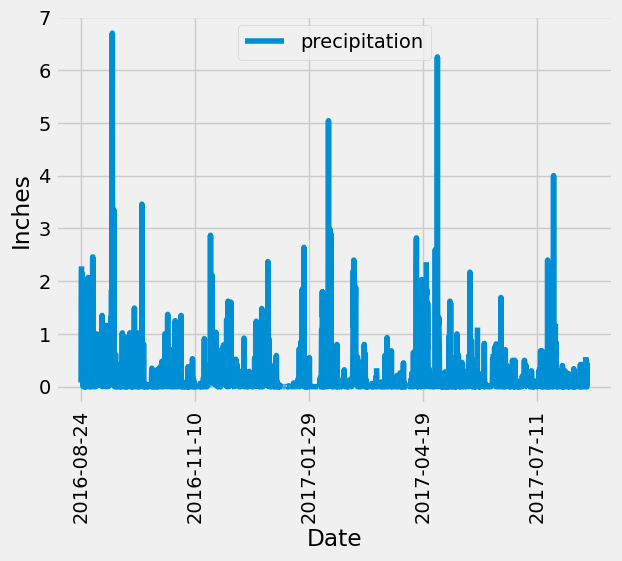

In [290]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Starting from the most recent data point in the database.

# Calculate the date one year from the last date in data set.
one_year = dt.datetime.strptime(most_recent, '%Y-%m-%d') - dt.timedelta(days=365)

# Perform a query to retrieve the date and precipitation scores.
prcp_results = session.query(Measurement.date, Measurement.prcp).\
                                filter(Measurement.date >= one_year).\
                                order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names.
prcp_df = pd.DataFrame(one_year_prcp, columns=['Date', 'precipitation'])
prcp_df.set_index('Date', inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot(rot=90)
plt.xlabel('Date')
plt.ylabel('Inches')
plt.show()

In [292]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcp_df.describe()

,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [298]:
# Design a query to calculate the total number of stations in the dataset.
total_stations = session.query(func.count(Station.station)).all()
total_stations

# alternate count of stations, with printed result.
stations = session.query(Station.station).count()
print(f"There are a total of {stations} stations in the dataset.")

There are a total of 9 stations in the dataset.


In [299]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_activity = session.query(Measurement.station,\
                                func.count(Measurement.station)).\
                                group_by(Measurement.station).\
                                order_by(func.count(Measurement.station).\
                                desc()).all()
station_activity

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [300]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
active_station_tobs = session.query(func.min(Measurement.tobs),\
                                    func.max(Measurement.tobs),\
                                    func.avg(Measurement.tobs)).\
                                    filter(Measurement.station == 'USC00519281').all()
active_station_tobs

[(54.0, 85.0, 71.66378066378067)]

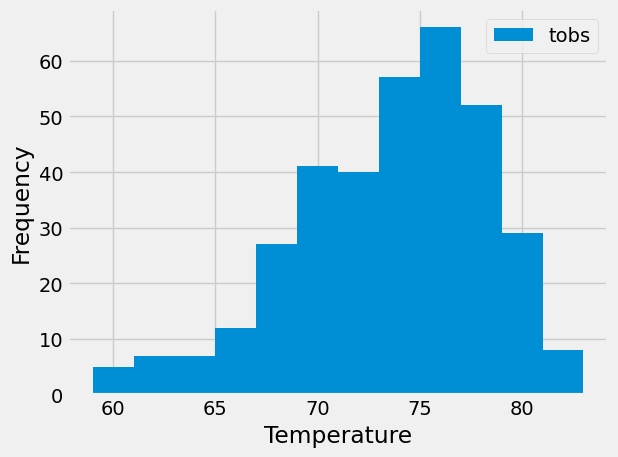

In [301]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

# Reuse one_year variable created earlier for date 12 months prior to most recent observation date
one_year_tobs = session.query(Measurement.tobs).\
                filter(Measurement.station == 'USC00519281').\
                filter(Measurement.date > one_year).all()

# Create dataframe
one_year_tobs = pd.DataFrame(one_year_tobs)

# Plot histogram
plt.hist(one_year_tobs, bins=12, label='tobs')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()

# Close Session

In [302]:
# Close Session
session.close()
